adm0_id: country id
adm0_name: country name
adm1_id: locality id
adm1_name: locality name
mkt_id: market id
mkt_name: market name
cm_id: commodity purchase id
cm_name: commodity purchased
cur_id: currency id
cur_name: name of currency
pt_id: market type id
pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
um_id: measurement id
um_name: unit of goods measurement
mp_month: month recorded
mp_year: year recorded
mp_price: price paid
mp_commoditysource: Source supplying price information

### Import Libraries and Load Data

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("wfp_market_food_prices.csv",encoding="latin-1")

In [9]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


### EDA - Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65763 entries, 0 to 65762
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adm0_id             65763 non-null  int64  
 1   adm0_name           65763 non-null  object 
 2   adm1_id             65763 non-null  int64  
 3   adm1_name           64928 non-null  object 
 4   mkt_id              65763 non-null  int64  
 5   mkt_name            65763 non-null  object 
 6   cm_id               65763 non-null  int64  
 7   cm_name             65763 non-null  object 
 8   cur_id              65763 non-null  int64  
 9   cur_name            65763 non-null  object 
 10  pt_id               65763 non-null  int64  
 11  pt_name             65763 non-null  object 
 12  um_id               65763 non-null  int64  
 13  um_name             65763 non-null  object 
 14  mp_month            65763 non-null  int64  
 15  mp_year             65763 non-null  int64  
 16  mp_p

In [11]:
df.rename(columns = {'adm0_id':'country_id', 'adm0_name':'country_name',
                     'adm1_id':'locality_id', 'adm1_name':'locality_name',
                     'mkt_id':'market_id',  'mkt_name':'market_name',
                     'cm_id':'purchase_id',  'cm_name':'product_purchased',
                     'cur_id':'currency_id', 'cur_name':'currency_name',
                     'pt_id ':'market_type_id', 'pt_name':'market_type',
                     'um_id':'measurement_id', 'um_name':'measurement_unit',
                     'mp_month':'month', 'mp_year':'year',
                     'mp_price':'price'}, inplace = True)

In [12]:
df.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,purchase_id,product_purchased,currency_id,currency_name,pt_id,market_type,measurement_id,measurement_unit,month,year,price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [13]:
df.describe()

,country_id,locality_id,market_id,purchase_id,currency_id,pt_id,measurement_id,month,year,price
count,65763.000000,65763.000000,65763.000000,65763.000000,65763.000000,65763.000000,65763.000000,65763.000000,65763.000000,6.576300e+04
mean,38.530511,14102.367365,703.417849,147.858264,46.089062,14.764822,10.201648,6.389672,2012.043474,2.050587e+04
std,18.629240,19810.550160,582.267639,106.897331,19.749920,0.424113,12.268653,3.418620,4.356569,1.808849e+05
min,1.000000,0.000000,112.000000,50.000000,25.000000,14.000000,5.000000,1.000000,1992.000000,2.400000e-01
25%,29.000000,610.000000,204.000000,67.000000,26.000000,15.000000,5.000000,3.000000,2010.000000,1.248585e+02
50%,43.000000,948.000000,641.000000,110.000000,46.000000,15.000000,5.000000,6.000000,2013.000000,3.550000e+02
75%,50.000000,40281.000000,852.000000,186.000000,60.000000,15.000000,5.000000,9.000000,2015.000000,1.600000e+03
max,68.000000,99878.000000,1965.000000,488.000000,91.000000,15.000000,86.000000,12.000000,2017.000000,5.833333e+06


In [14]:
df.corr()

,country_id,locality_id,market_id,purchase_id,currency_id,pt_id,measurement_id,month,year,price
country_id,1.000000,0.140953,0.011570,-0.064099,-0.283738,-0.378333,-0.159573,-0.021159,-0.057024,0.012480
locality_id,0.140953,1.000000,-0.389534,-0.214690,-0.369449,0.353297,-0.093136,-0.009846,-0.195500,-0.074984
market_id,0.011570,-0.389534,1.000000,0.173725,0.224402,-0.349888,0.129153,-0.001152,0.370496,0.012594
purchase_id,-0.064099,-0.214690,0.173725,1.000000,0.342327,-0.147542,0.330282,0.003766,0.170631,0.056175
currency_id,-0.283738,-0.369449,0.224402,0.342327,1.000000,-0.335135,0.309656,0.017238,0.100629,0.136615
pt_id,-0.378333,0.353297,-0.349888,-0.147542,-0.335135,1.000000,-0.088317,0.001150,-0.030909,-0.117483
measurement_id,-0.159573,-0.093136,0.129153,0.330282,0.309656,-0.088317,1.000000,0.001212,0.122492,0.119230
month,-0.021159,-0.009846,-0.001152,0.003766,0.017238,0.001150,0.001212,1.000000,-0.065654,0.007819
year,-0.057024,-0.195500,0.370496,0.170631,0.100629,-0.030909,0.122492,-0.065654,1.000000,-0.032584
price,0.012480,-0.074984,0.012594,0.056175,0.136615,-0.117483,0.119230,0.007819,-0.032584,1.000000


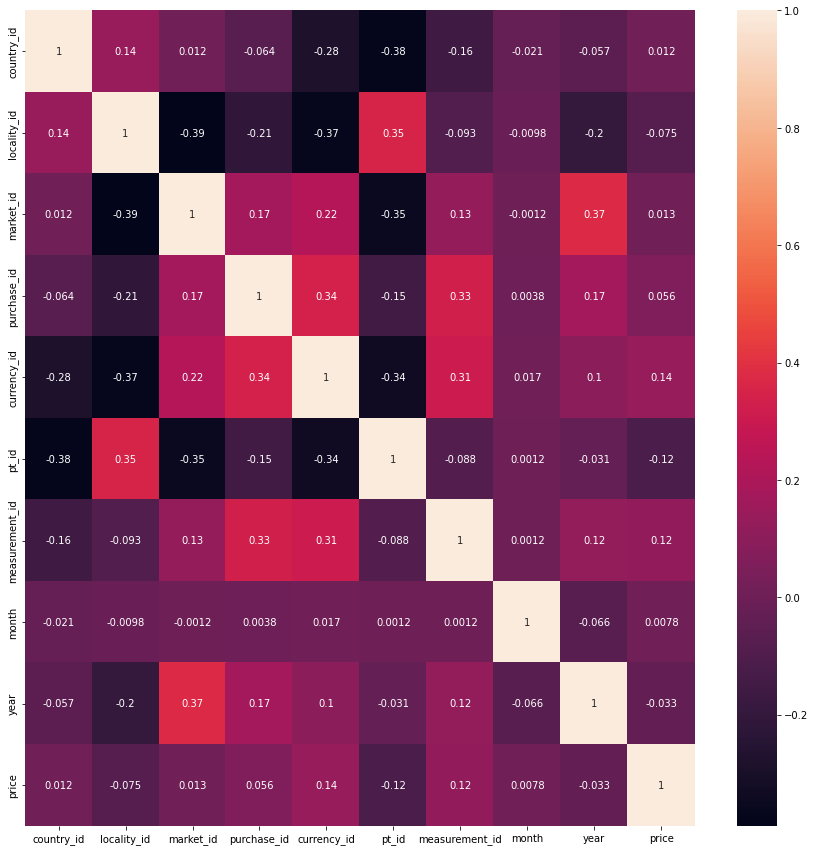

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [16]:
df.isnull().sum()

country_id              0
country_name            0
locality_id             0
locality_name         835
market_id               0
market_name             0
purchase_id             0
product_purchased       0
currency_id             0
currency_name           0
pt_id                   0
market_type             0
measurement_id          0
measurement_unit        0
month                   0
year                    0
price                   0
mp_commoditysource      0
dtype: int64

In [17]:
df.shape

(65763, 18)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(64928, 18)

In [20]:
df.isnull().sum()

country_id            0
country_name          0
locality_id           0
locality_name         0
market_id             0
market_name           0
purchase_id           0
product_purchased     0
currency_id           0
currency_name         0
pt_id                 0
market_type           0
measurement_id        0
measurement_unit      0
month                 0
year                  0
price                 0
mp_commoditysource    0
dtype: int64

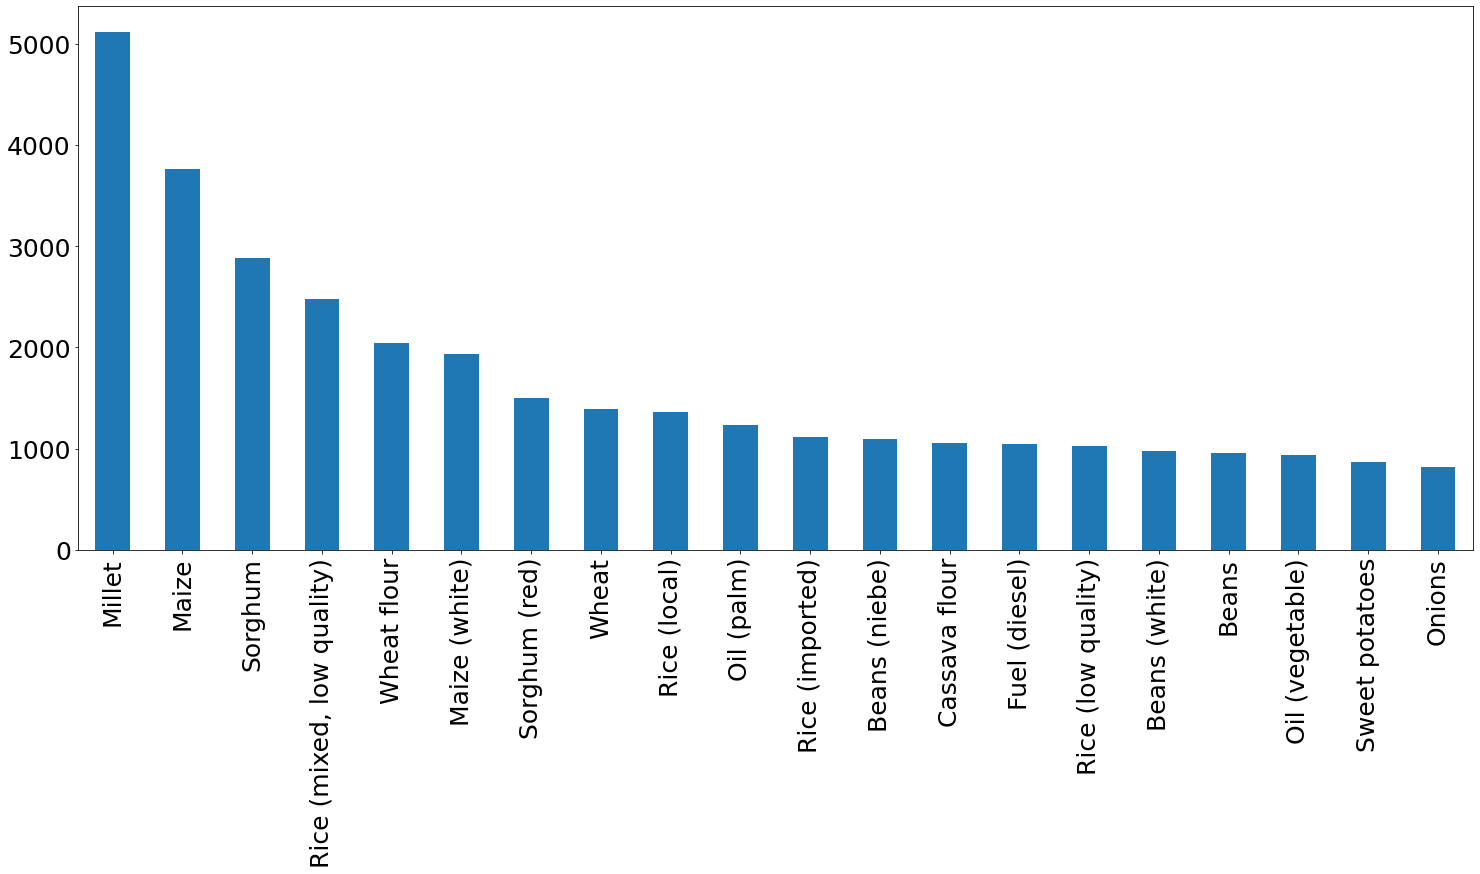

In [21]:
plt.figure(figsize=(25,10))
df.product_purchased.value_counts(ascending=False)[:20].plot.bar(fontsize=25)

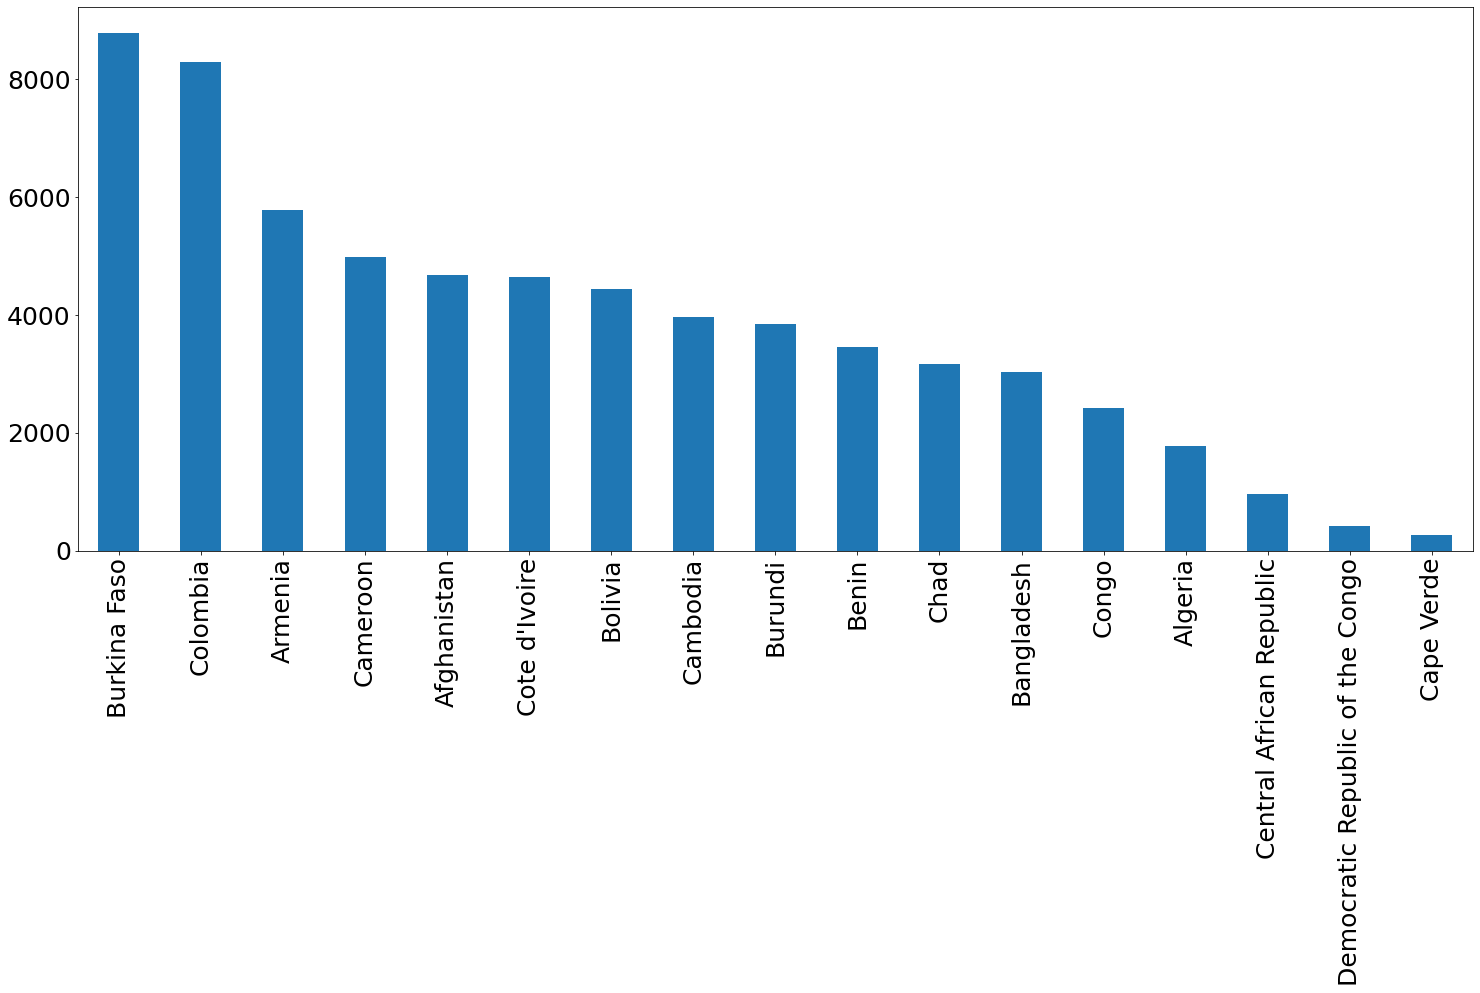

In [22]:
plt.figure(figsize=(25,10))
df.country_name.value_counts(ascending=False)[:20].plot.bar(fontsize=25)

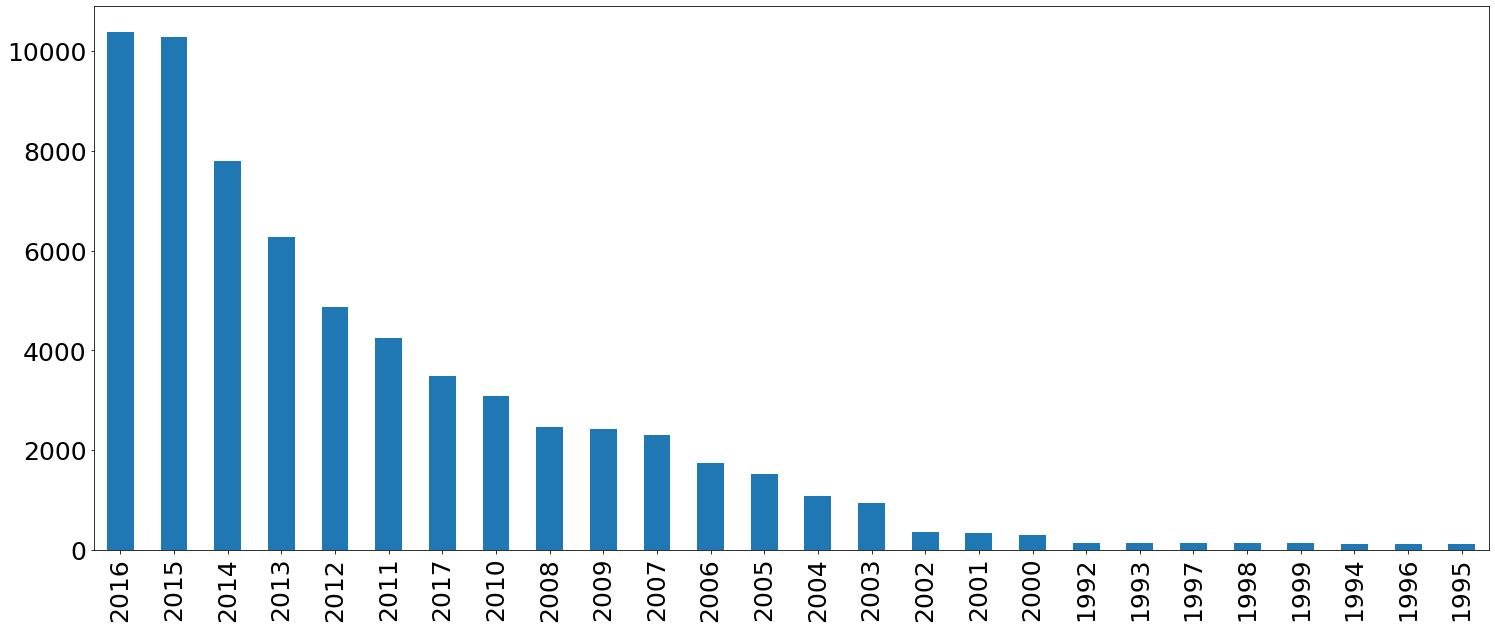

In [23]:
plt.figure(figsize=(25,10))
df.year.value_counts().plot.bar(fontsize=25)

## Apply ML Algorithms

In [24]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [25]:
x,y=df.drop("price",axis=1),df["price"]

In [26]:
x=pd.get_dummies(x,drop_first=True)

In [27]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
ExtraTreeRegressor,0.979969,26023.194985,1533.028226
GradientBoostingRegressor,0.967081,33360.463283,3316.720936
KNeighborsRegressor,0.958491,37460.993354,2718.990919
LinearRegression,0.926511,49844.479509,6484.679655
Lasso,0.926492,49851.211014,6494.571259
Ridge,0.926113,49979.374276,6785.761570
ElasticNet,0.086923,175695.578958,41037.889608


### Deep Learning Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [29]:
x=scaler.fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [31]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [32]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, verbose=1)

Epoch 1/50
406/406 [==============================] - 6s 4ms/step - loss: 9755211776.0000 - val_loss: 1691515904.0000
Epoch 2/50
406/406 [==============================] - 2s 4ms/step - loss: 4378228224.0000 - val_loss: 2234250496.0000
Epoch 3/50
406/406 [==============================] - 2s 4ms/step - loss: 4811980288.0000 - val_loss: 3800536832.0000
Epoch 4/50
406/406 [==============================] - 2s 4ms/step - loss: 3541800960.0000 - val_loss: 1733462016.0000
Epoch 5/50
406/406 [==============================] - 2s 4ms/step - loss: 3672939520.0000 - val_loss: 1993395584.0000
Epoch 6/50
406/406 [==============================] - 2s 4ms/step - loss: 3261803264.0000 - val_loss: 1655900672.0000
Epoch 7/50
406/406 [==============================] - 2s 4ms/step - loss: 5132626432.0000 - val_loss: 2479379712.0000
Epoch 8/50
406/406 [==============================] - 2s 4ms/step - loss: 3403585024.0000 - val_loss: 1668883840.0000
Epoch 9/50
406/406 [==============================] - 2s

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               299520    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

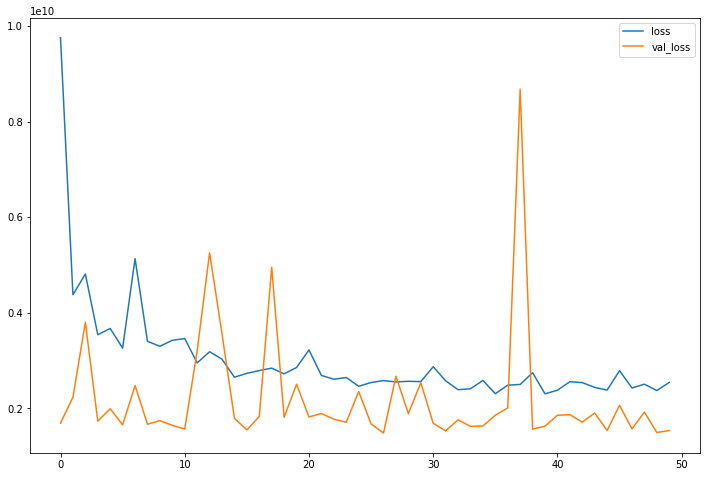

In [34]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [35]:
pred=model.predict(x_test)

406/406 [==============================] - 1s 2ms/step


In [36]:
(mean_squared_error(y_test,pred))**.5

39205.580882680304

In [37]:
r2_score(y_test,pred)

0.9545345626146108